In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [2]:
canvas = mpimg.imread('./canvas.jpeg')
texture = mpimg.imread('./textura.jpeg')

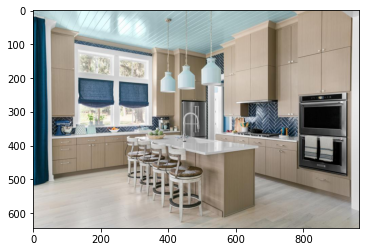

In [3]:
imgplot = plt.imshow(canvas)

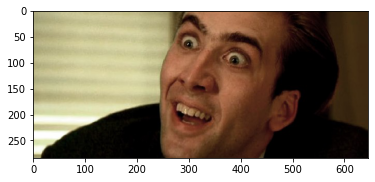

In [4]:
imgplot = plt.imshow(texture)

In [5]:
texture_coord = np.array([[0, 0, 1], [284, 0, 1], [284, 646, 1], [0, 646, 1]])
canvas_coord = np.array([[409, 656, 1], [420, 566, 1],[609, 566, 1], [578, 654, 1]])

In [6]:
print(texture_coord)
print(canvas_coord)

[[  0   0   1]
 [284   0   1]
 [284 646   1]
 [  0 646   1]]
[[409 656   1]
 [420 566   1]
 [609 566   1]
 [578 654   1]]


In [7]:
T_helper = np.zeros((12,12))
B_helper = np.zeros((12,1))

In [8]:
for i in range(4):
    for j in range(3):
        for k in range(3):
            T_helper[3*i+k][j+3*k] = texture_coord[i][j]

for i in range(3):
    B_helper[i][0] = canvas_coord[0][i]
    
T_helper[3*1][9] = -canvas_coord[0+1][0];
T_helper[3*1 + 1][9] = -canvas_coord[0+1][1];
T_helper[3*1 + 2][9] = -canvas_coord[0+1][2];

T_helper[3*2][10] = -canvas_coord[1+1][0];
T_helper[3*2 + 1][10] = -canvas_coord[1+1][1];
T_helper[3*2 + 2][10] = -canvas_coord[1+1][2];

T_helper[3*3][11] = -canvas_coord[2+1][0];
T_helper[3*3 + 1][11] = -canvas_coord[2+1][1];
T_helper[3*3 + 2][11] = -canvas_coord[2+1][2];

In [9]:
print(T_helper, B_helper)

[[   0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.]
 [ 284.    0.    1.    0.    0.    0.    0.    0.    0. -420.    0.    0.]
 [   0.    0.    0.  284.    0.    1.    0.    0.    0. -566.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  284.    0.    1.   -1.    0.    0.]
 [ 284.  646.    1.    0.    0.    0.    0.    0.    0.    0. -609.    0.]
 [   0.    0.    0.  284.  646.    1.    0.    0.    0.    0. -566.    0.]
 [   0.    0.    0.    0.    0.    0.  284.  646.    1.    0.   -1.    0.]
 [   0.  646.    1.    0.    0.    0.    0.    0.    0.    0.    0. -578.]
 [   0.    0.    0.    0.  646.    1.    0.    0.    0.    0.    0. -654.]
 [   0.    0.    0.    0.    0.    0.    0.  646.    1.    0.    0.   -1.]] [[409.]
 [656.]
 [  1.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]]


In [10]:
sol_helper = np.linalg.solve(T_helper, B_helper)
print(sol_helper)

transform = np.zeros((3,3))

for i in range(9):
    transform[i//3][i%3] = sol_helper[i][0]

print(transform)

[[-1.23275004e-01]
 [ 2.81944835e-01]
 [ 4.09000000e+02]
 [-5.35225664e-01]
 [ 1.99127498e-02]
 [ 6.56000000e+02]
 [-3.85731900e-04]
 [ 3.51815367e-05]
 [ 1.00000000e+00]
 [ 8.90452140e-01]
 [ 9.13179413e-01]
 [ 1.02272727e+00]]
[[-1.23275004e-01  2.81944835e-01  4.09000000e+02]
 [-5.35225664e-01  1.99127498e-02  6.56000000e+02]
 [-3.85731900e-04  3.51815367e-05  1.00000000e+00]]


In [11]:
aux = np.matmul(transform, texture_coord[3])
aux = aux/aux[2]

print(texture_coord[3])
print(aux)

[  0 646   1]
[578. 654.   1.]


In [12]:
inv_transform = np.linalg.inv(transform)
#print(inv_transform)
aux = np.matmul(inv_transform, canvas_coord[0])
aux = aux / aux[2]
print(aux)

[0.00000000e+00 2.27373675e-13 1.00000000e+00]


In [13]:
test_texture = np.copy(texture)
test_canvas = np.copy(canvas)

print(test_texture.shape)
print(test_canvas.shape)

(284, 646, 3)
(644, 966, 3)


In [14]:
for i in range(len(test_canvas)):
    for j in range(len(test_canvas[0])):
        c_coord_proj = np.array([i, j, 1])
        t_coord_proj = np.matmul(inv_transform, c_coord_proj)
        t_coord_proj = t_coord_proj/t_coord_proj[2]
        
        if(i == 0 and j == 0):
            print(t_coord_proj)
            print(c_coord_proj)

        a,b = int(t_coord_proj[0]), int(t_coord_proj[1])
        
        if(a >= 0 and a < 284 and b >= 0 and b < 646):
            test_canvas[i][j] = test_texture[a][b]

[ 1.19105592e+03 -9.29871892e+02  1.00000000e+00]
[0 0 1]


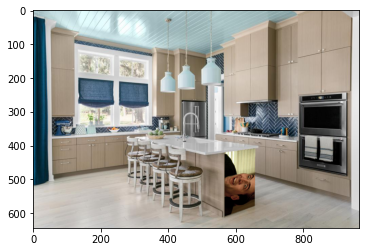

In [15]:
result = plt.imshow(test_canvas)